# 3. Polynomial Regression(다항회귀)

- 앞에서 작업했던 것처럼 데이터의 형태가 직선 하나로 표현될 수 있는 것은 아님
- 그래프 예제(https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)
<img src='https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png'>


## 공식  <h3> y = b + m<sub>1</sub>x + m<sub>2</sub>x<sup>2</sup> + m<sub>3</sub>x<sup>3</sup> + ....... + m<sub>n</sub>x<sup>n</sup></h3>
    - 독립변수 x 를 확장하는 방식

#### [참고] https://arachnoid.com/polysolve/

### 공부 시간에 따른 시험 점수 (우등생)

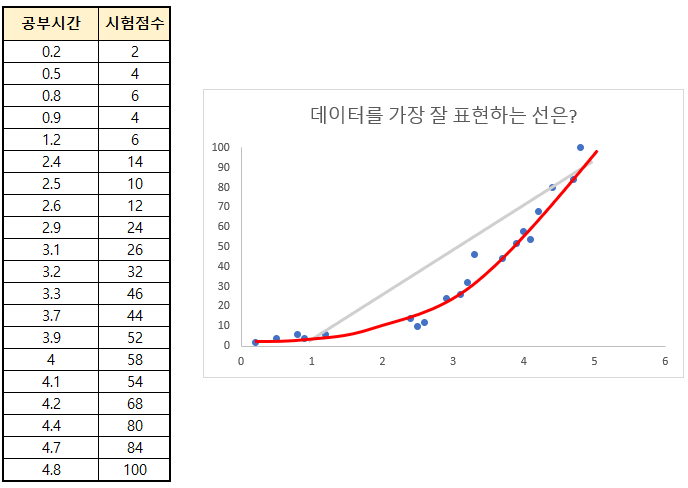

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수처리
plt.rcParams['axes.unicode_minus'] = False


import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("./dataset/PolynomialRegressionData.csv")

In [3]:
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 단순선형회귀

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X, y)

LinearRegression()

In [8]:
y_pred = lr.predict(X)

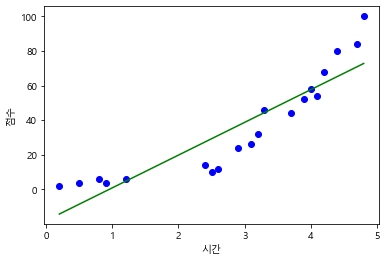

In [11]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="green")
plt.xlabel("시간")
plt.ylabel("점수")
plt.show()

In [12]:
lr.score(X,y)

0.8169296513411765

### 다항회귀
- 사이킷런은 다항회귀를 위한 API 가 없음
- PolynomialFeatures() 를 통해 단항 Feature 를 다항 Feature 로 변환 후 LinearRegression 적용

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(X) # [x] => [x^0, x^1, x^2]

In [14]:
X_poly

array([[ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  0.9 ,  0.81],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.6 ,  6.76],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.1 ,  9.61],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.9 , 15.21],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.1 , 16.81],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  4.8 , 23.04]])

In [15]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [16]:
poly_lr = LinearRegression()

In [17]:
poly_lr.fit(X_poly, y)

LinearRegression()

In [18]:
y_poly_pred = poly_lr.predict(X_poly)

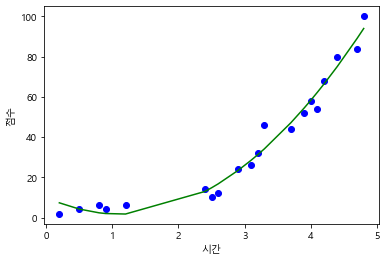

In [20]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_poly_pred, color="green")
plt.xlabel("시간")
plt.ylabel("점수")
plt.show()

#### 공부 시간에 따른 시험 성적 예측

In [21]:
# 단순선형회귀

lr.predict([[2]])

array([19.85348988])

In [25]:
# 다항회귀

poly_lr.predict(poly.fit_transform([[2]]))

array([7.05092142])

####  항(차원)의 개수를 올림 

In [31]:
poly_4 = PolynomialFeatures(degree = 4)

X_poly_4 = poly_4.fit_transform(X) # [x] => [x^0, x^1, x^2, x^3, x^4]

In [32]:
poly_lr_4 = LinearRegression()

In [33]:
poly_lr_4.fit(X_poly_4, y)

LinearRegression()

In [34]:
y_poly_4_pred = poly_lr_4.predict(X_poly_4)

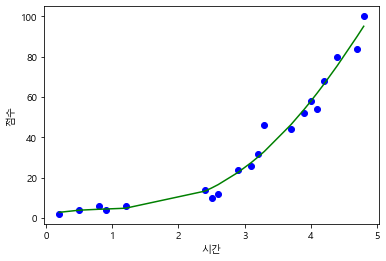

In [35]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_poly_4_pred, color="green")
plt.xlabel("시간")
plt.ylabel("점수")
plt.show()

In [36]:
poly_lr_4.predict(poly_4.fit_transform([[2]]))

array([8.70559135])

### 과대 적합

In [37]:
poly_10 = PolynomialFeatures(degree = 10)

X_poly_10 = poly_10.fit_transform(X) # [x] => [x^0, x^1, x^2, x^3, x^4]

In [38]:
poly_lr_10 = LinearRegression()

In [39]:
poly_lr_10.fit(X_poly_10, y)

y_poly_10_pred = poly_lr_10.predict(X_poly_10)

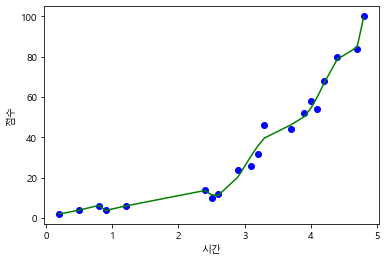

In [40]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_poly_10_pred, color="green")
plt.xlabel("시간")
plt.ylabel("점수")
plt.show()

In [41]:
poly_lr_10.predict(poly_10.fit_transform([[2]])) # 과대적합으로 인해 데이터가 맞지 않음

array([29.89734711])

### 사이킷런 과소적합/과대적합

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html